In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [98]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.025
electrical_link = 0.02

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.025, 0.02]

In [123]:
# Инициализация интервала параметра
start_chem= 0.025 # 0.000 # Стартовое значение параметра
finish_chem = -0.30 # Конечное значение параметра
len_chem = 10000 #  Длина интервала параметра
range_chem = range(start_chem, finish_chem, length = len_chem  ) # Интервал параметра

number_transient_points = 10000.0 # Время в течении которого эволюционирует траектория, перед сохранением точек
number_save_points = 1000.0 # Время в течении которого сохраняются точки

idx_control_p = 10 # Индекс управляющего параметра

tstep = 0.01 # Шаг по времени для интегратора
setting_integrate = (alg = Vern9(), adaptive = false, dt = tstep); # Настройки интегратора

# Сечение Пуанкаре
idx_fix_var = 2 # Индекс фиксируемой переменной
val_fix = 0.0 # Значение фиксируемой переменной
surface = (idx_fix_var, val_fix) # Инициализация сечения Пуанкаре
setting_root = (xrtol = 1e-11, atol = 1e-11) # Настройки Для сечения Пуанкаре

(xrtol = 1.0e-11, atol = 1.0e-11)

In [ ]:
idx_save_var = 1 # Индекс сохраняемой переменной
x_1 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = 0.025
parameter = 0.024967496749674967
parameter = 0.024934993499349935
parameter = 0.024902490249024904
parameter = 0.02486998699869987
parameter = 0.02483748374837484
parameter = 0.024804980498049804
parameter = 0.024772477247724772
parameter = 0.02473997399739974
parameter = 0.024707470747074706
parameter = 0.024674967496749675
parameter = 0.024642464246424644
parameter = 0.02460996099609961
parameter = 0.024577457745774578
parameter = 0.024544954495449543
parameter = 0.024512451245124512
parameter = 0.02447994799479948
parameter = 0.024447444744474446
parameter = 0.024414941494149415
parameter = 0.024382438243824384
parameter = 0.02434993499349935
parameter = 0.024317431743174318
parameter = 0.024284928492849286
parameter = 0.024252425242524252
parameter = 0.02421992199219922
parameter = 0.024187418741874186
parameter = 0.024154915491549155
parameter = 0.024122412241224123
parameter = 0.02408990899089909
parameter = 0.024057405740574057
parameter = 0.024024902490249026


parameter = 0.01680918091809181
parameter = 0.016776677667766776
parameter = 0.016744174417441745
parameter = 0.01671167116711671
parameter = 0.01667916791679168
parameter = 0.016646664666466648
parameter = 0.016614161416141613
parameter = 0.016581658165816582
parameter = 0.01654915491549155
parameter = 0.016516651665166516
parameter = 0.016484148414841485
parameter = 0.01645164516451645
parameter = 0.01641914191419142
parameter = 0.016386638663866387
parameter = 0.016354135413541353
parameter = 0.01632163216321632
parameter = 0.01628912891289129
parameter = 0.016256625662566256
parameter = 0.016224122412241224
parameter = 0.016191619161916193
parameter = 0.01615911591159116
parameter = 0.016126612661266127
parameter = 0.016094109410941092
parameter = 0.01606160616061606
parameter = 0.01602910291029103
parameter = 0.015996599659965995
parameter = 0.015964096409640964
parameter = 0.015931593159315933
parameter = 0.015899089908990898
parameter = 0.015866586658665867
parameter = 0.0158340

parameter = 0.008683368336833683
parameter = 0.008650865086508652
parameter = 0.008618361836183619
parameter = 0.008585858585858586
parameter = 0.008553355335533553
parameter = 0.008520852085208521
parameter = 0.008488348834883488
parameter = 0.008455845584558455
parameter = 0.008423342334233423
parameter = 0.008390839083908391
parameter = 0.008358335833583358
parameter = 0.008325832583258325
parameter = 0.008293329332933294
parameter = 0.008260826082608261
parameter = 0.008228322832283228
parameter = 0.008195819581958195
parameter = 0.008163316331633164
parameter = 0.008130813081308131
parameter = 0.008098309830983098
parameter = 0.008065806580658065
parameter = 0.008033303330333034
parameter = 0.008000800080008
parameter = 0.007968296829682968
parameter = 0.007935793579357937
parameter = 0.007903290329032904
parameter = 0.00787078707870787
parameter = 0.007838283828382838
parameter = 0.007805780578057806
parameter = 0.0077732773277327735
parameter = 0.0077407740774077406
parameter = 

parameter = 0.0006875687568756876
parameter = 0.0006550655065506551
parameter = 0.0006225622562256225
parameter = 0.0005900590059005901
parameter = 0.0005575557555755576
parameter = 0.000525052505250525
parameter = 0.0004925492549254925
parameter = 0.00046004600460046
parameter = 0.00042754275427542754
parameter = 0.00039503950395039506
parameter = 0.0003625362536253625
parameter = 0.00033003300330033004
parameter = 0.00029752975297529755
parameter = 0.000265026502650265
parameter = 0.00023252325232523254
parameter = 0.00020002000200020003
parameter = 0.00016751675167516752
parameter = 0.000135013501350135
parameter = 0.00010251025102510251
parameter = 7.000700070007e-5
parameter = 3.750375037503751e-5
parameter = 5.000500050005001e-6
parameter = -2.7502750275027502e-5
parameter = -6.000600060006001e-5
parameter = -9.25092509250925e-5
parameter = -0.000125012501250125
parameter = -0.00015751575157515752
parameter = -0.00019001900190019003
parameter = -0.00022252225222522251
parameter =

parameter = -0.0070807080708070805
parameter = -0.0071132113211321134
parameter = -0.0071457145714571456
parameter = -0.0071782178217821785
parameter = -0.007210721072107211
parameter = -0.007243224322432244
parameter = -0.007275727572757276
parameter = -0.007308230823082308
parameter = -0.007340734073407341
parameter = -0.007373237323732373
parameter = -0.007405740574057406
parameter = -0.007438243824382438
parameter = -0.007470747074707471
parameter = -0.007503250325032503
parameter = -0.007535753575357536
parameter = -0.007568256825682568
parameter = -0.007600760076007601
parameter = -0.007633263326332633
parameter = -0.007665766576657666
parameter = -0.007698269826982698
parameter = -0.00773077307730773
parameter = -0.007763276327632763
parameter = -0.007795779577957795
parameter = -0.007828282828282828
parameter = -0.007860786078607861
parameter = -0.007893289328932893
parameter = -0.007925792579257926
parameter = -0.007958295829582959
parameter = -0.007990799079907992
parameter =

parameter = -0.014946494649464947
parameter = -0.01497899789978998
parameter = -0.01501150115011501
parameter = -0.015044004400440044
parameter = -0.015076507650765077
parameter = -0.01510901090109011
parameter = -0.01514151415141514
parameter = -0.015174017401740174
parameter = -0.015206520652065207
parameter = -0.01523902390239024
parameter = -0.015271527152715271
parameter = -0.015304030403040304
parameter = -0.015336533653365337
parameter = -0.015369036903690368
parameter = -0.015401540154015401
parameter = -0.015434043404340434
parameter = -0.015466546654665467
parameter = -0.015499049904990498
parameter = -0.015531553155315531
parameter = -0.015564056405640564
parameter = -0.015596559655965597
parameter = -0.01562906290629063
parameter = -0.015661566156615663
parameter = -0.015694069406940694
parameter = -0.015726572657265726
parameter = -0.01575907590759076
parameter = -0.01579157915791579
parameter = -0.015824082408240823
parameter = -0.015856585658565858
parameter = -0.0158890

In [ ]:
idx_save_var = 4 # Индекс сохраняемой переменной
x_2 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

In [ ]:
x_sum = x_1 + x_2;

In [ ]:
lab_size = 25; tick_size = 15

In [ ]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end

fig

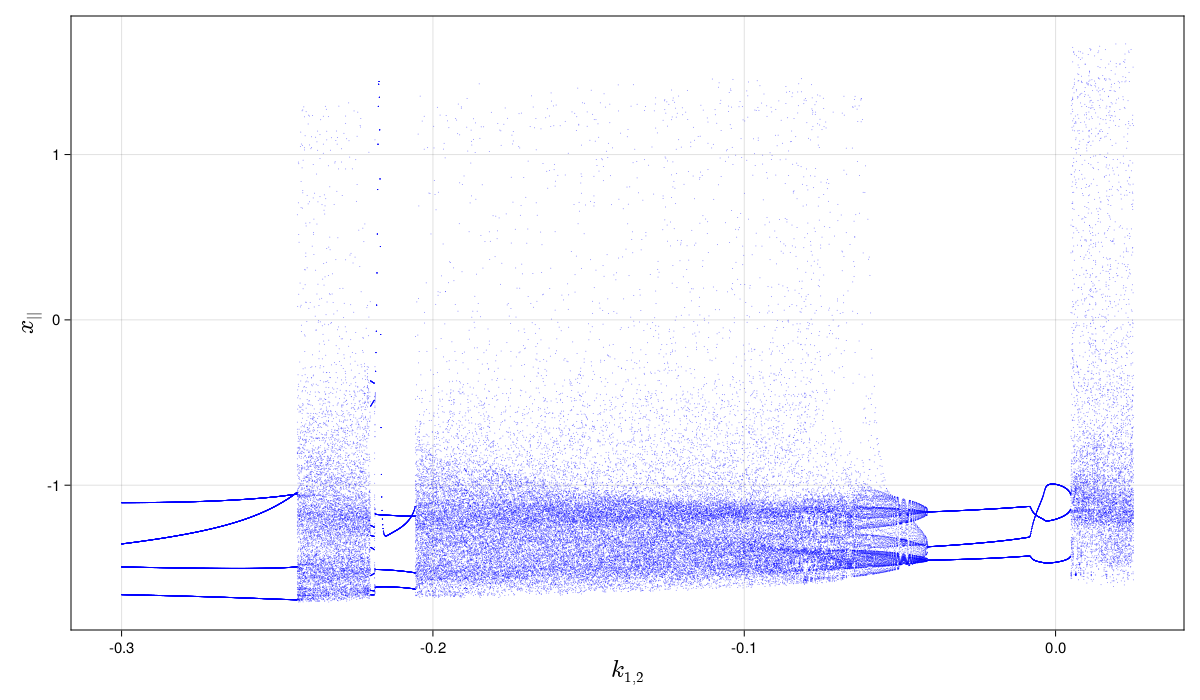

In [105]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end

fig

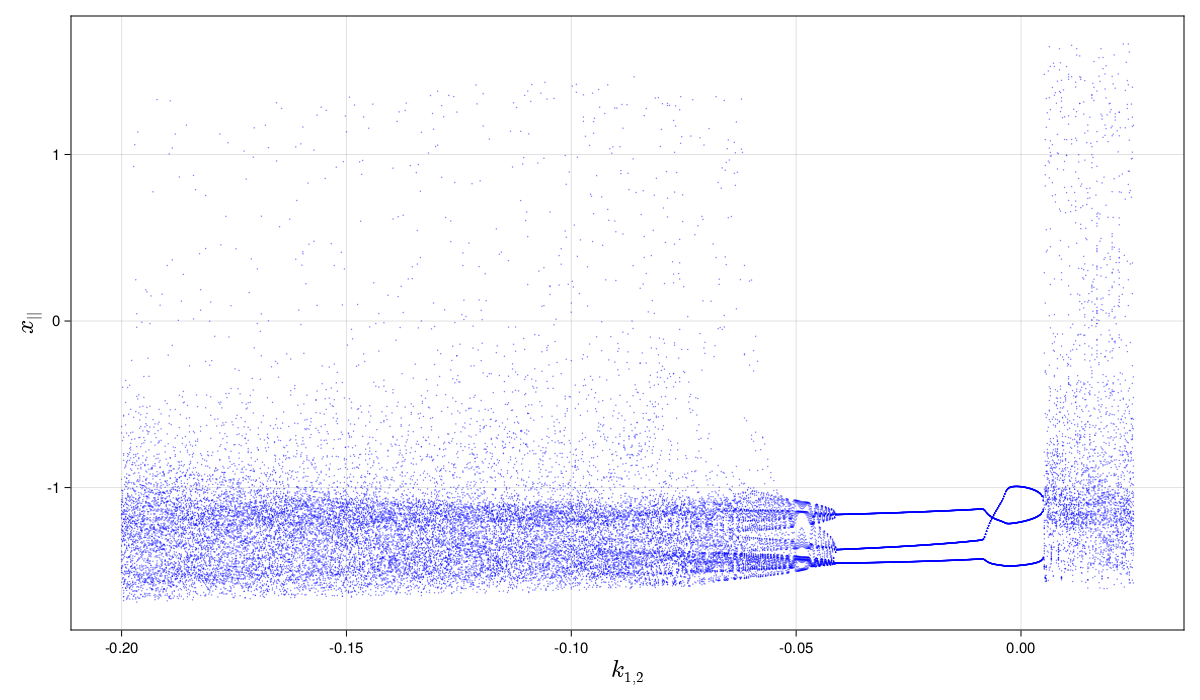

In [97]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.5)
end

fig